In [1]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
print("Shape of dataset:")
print(df.shape)

print("\nColumns:")
print(df.columns)

print("\nInfo:")
print(df.info())

print("\nDescription:")
print(df.describe())


Shape of dataset:
(150, 5)

Columns:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Description:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%       

In [3]:
print(df['species'].value_counts())
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print("\nAfter Encoding:")
print(df.head())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

After Encoding:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


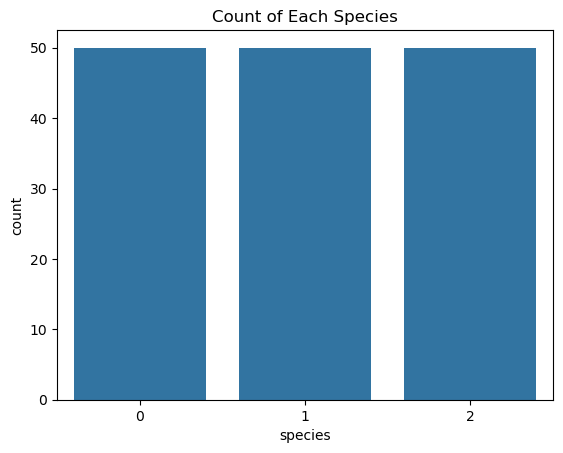

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species', data=df)
plt.title("Count of Each Species")
plt.show()


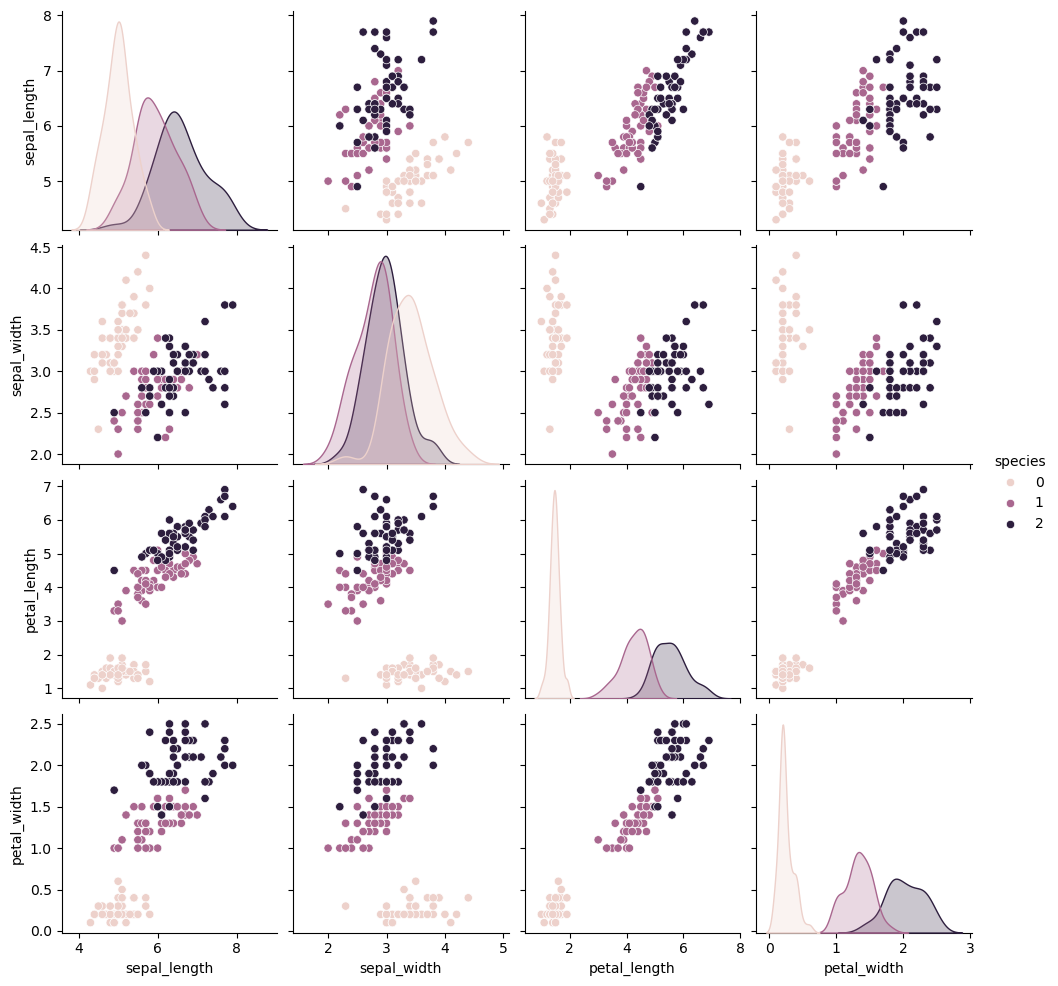

In [5]:

sns.pairplot(df, hue='species')
plt.show()


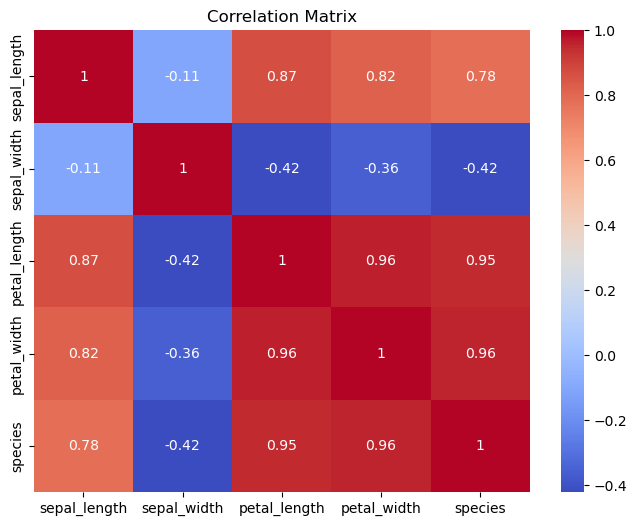

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [7]:
X = df.drop('species', axis=1)
y = df['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (120, 4)
Test shape: (30, 4)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=200)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 1.0


In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0


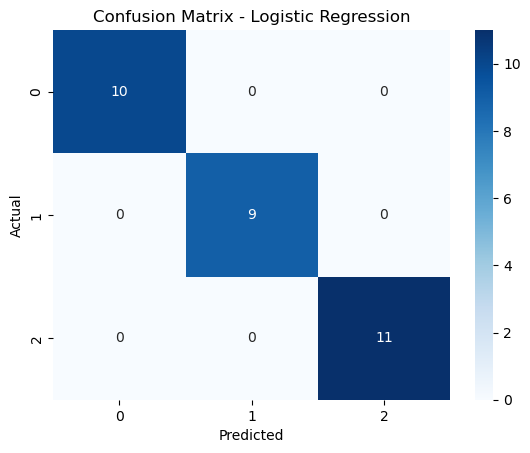

In [22]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/confusion_matrix_logistic.png")
plt.show()



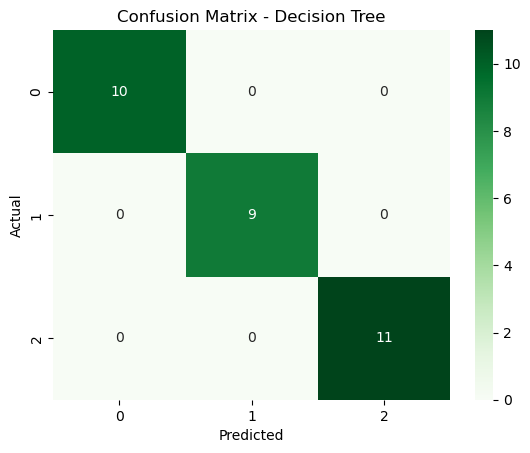

In [23]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("images/confusion_matrix_tree.png")
plt.show()




In [12]:
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

print("Decision Tree Accuracy:",
      accuracy_score(y_test, y_pred_tree))


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [13]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = log_model.predict(new_sample)
print("Predicted Species:", le.inverse_transform(prediction))


Predicted Species: ['Iris-setosa']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
